# **Week 5 - Decision Trees**
This notebook accompanies the Week 5 slides to learn about decision trees, entropy and information gain, random forests, and ensemble learning.

**In this notebook, you will:**
*   Train a decision tree classifier on the Titanic dataset
*   Train a random forest classifier on the Titanic dataset
*   Visualize the trees
*   Compare decision trees vs random forest
*   Tune hyperparameters and see their effects



## **0. Setup**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split

## **1. Data Processing**

For this notebook, we will be using the Titanic dataset. While the Titanic was one of the most infamous shipwrecks in history, there were certain groups of people who were more likely to survive than others.

In this notebook, you will build a predictive model using decision trees and random forests to find which groups of passengers were more likely to survive. Before we build the model, you will first need to perform some preprocessing on the passenger data.

In [ ]:
# Load dataset
df = sns.load_dataset("titanic").dropna(subset=["age", "embarked", "sex"])

# Cols we care about: survived; ticket class (1, 2, 3); gender; age; # siblings/spouse aboard; # parents/children aboard; fare; alone; port boarded
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "alone", "embarked"]]

# TODO: Map categorical string inputs to integers for "Sex" and "Embarked"
# - Ex. df["colour"] = df["colour"].map({"red": 0, "blue": 1})
# - df["sex"] has the values "male" and "female"
# - df["embarked"] has the values "S", "C", and "Q"

# TODO: Since this is a relatively smaller dataset, we can also engineer our own features to include.
# - Create a new column 'family_size' = 'sibsp' + 'parch' + 1

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 569, Test samples: 143


## **2. Decision Tree Classifier**

Setting up a decision tree classifier using sklearn is relatively straightforward. However, how you design the tree is up to you and can be done by passing parameters into `DecisionTreeClassifier`.

Here are some of the parameters that you can edit:
*   **criterion**: determines how to measure the quality of the split (`gini` (default) vs `entropy`)
*   **max_depth**: maximum depth of the tree
*   **min_samples_split**: minimum samples required to split a node
*   **min_samples_leaf**: minimum samples required in leaf node
*   **max_leaf_nodes**: limits total number of leaves on tree
*   **max_features**: number of features to consider for best split
*   **splitter**: how to choose split at each node (`best`(default) vs `random`)
*   **class_weight**: adjusts weight for imbalanced classes (`None`(default) vs `balanced`)
*   **random_state**: seed for reproducibility (We highly recommend setting this to some arbitrary value to accurately compare models)



In [ ]:
# TODO: design and train your model here
# Ex. decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

## **3. Random Forest Classifier**

Setting up a random forest classifier follows the same procedure as the decision tree. It has most of the same parameters except for **splitter**.

There are also some parameters unique to the random forest:
*   **n_estimators**: number of trees in the forest (default=100)
*   **bootstrap**: if each tree should train on a random sample with replacement (default=True)
*   **oob_score**: whether to use out-of-bag samples for validation (default=False)
*   **n_jobs**: number of parallel jobs (can speed up training)
*   **warm_start**: whether to use previous solution (can add trees incrementally)



In [ ]:
# TODO: train your model here
# Ex.random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
# random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)

## **4. Evaluate performance**

There are typically 4 main ways we can evaluate model performance: **accuracy**, **precision**, **recall**, and **F1 scores**.

Typically, we prefer to use accuracy when we have balanced datasets (Ex. 50 true, 50 false). The other 3 metrics can be used for both balanced and imbalanced dataset (Ex. 90 true, 10 false).

**Accuracy** represents the overall correctness of the model and can be found using `accuracy_score` from sklearn.
$$
\text{Accuracy} = \frac{TP+TN}{TP + FP + FN + TN}
$$
  
<br>

The other 3 metrics can be found using `classification_report` from sklearn which returns the precision, recall, f1-score, and support.

**Precision** represents the number of predicted positives that were correct. We want to use this score when we want to limit the number of false positives (Ex. We want to be very certain when diagnosing cancer).

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Recall** represents how many actual positives were found. We want to use this score to limit the number of false negatives. (Ex. For self-driving cars, it is better to label many objects as pedestrians even if they aren't, rather than missing someone).

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**F1** score combines the precision and recall.
$$
\text{F1} = 2\times\frac{(\text{Precision}\times\text{Recall})}{(\text{Precision} + \text{Recall})}
$$

**Support** represents the number of samples in each class.


In [ ]:
def print_results(name, model):
  y_pred = model.predict(X_test)
  print(f"Performance for {name}:\n")

  print("TRAINING SET")
  print("-" * 60)
  print("Accuracy:", accuracy_score(y_train, model.predict(X_train)))
  print(classification_report(y_train, model.predict(X_train)))

  print("TESTING SET")
  print("-" * 60)
  print("Accuracy:", accuracy_score(y_test, y_pred))
  report = classification_report(y_test, y_pred)
  print(report)

In [ ]:
print_results("Decision Tree", decision_tree)

Performance for Decision Tree:

TRAINING SET
------------------------------------------------------------
Accuracy: 0.8558875219683656
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       344
           1       0.91      0.71      0.80       225

    accuracy                           0.86       569
   macro avg       0.87      0.83      0.84       569
weighted avg       0.86      0.86      0.85       569

TESTING SET
------------------------------------------------------------
Accuracy: 0.7762237762237763
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        80
           1       0.84      0.60      0.70        63

    accuracy                           0.78       143
   macro avg       0.79      0.76      0.76       143
weighted avg       0.79      0.78      0.77       143



In [ ]:
print_results("Random Forest", random_forest)

Performance for Random Forest:

TRAINING SET
------------------------------------------------------------
Accuracy: 0.8910369068541301
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       344
           1       0.92      0.79      0.85       225

    accuracy                           0.89       569
   macro avg       0.90      0.87      0.88       569
weighted avg       0.89      0.89      0.89       569

TESTING SET
------------------------------------------------------------
Accuracy: 0.7972027972027972
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.67      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



Looking at the scores above, which metric would you take into account for this dataset and task?

In [3]:
# TODO: Hint! Check the balance in the dataset.

## **5. Plot Trees**

We can visualize the trees to see how decisions were made. Each box in the tree shows:
* Which **feature** we are evaluating
* The **decision rule**
* Gini **impurity** or other criterion
  * A purer prediction corresponds to a darker colour (Ex. dark blue for likely to survive, dark orange for likely to die, light orange for somewhat likely to die)
  * 0 <= Gini <= 0.5 (close to 0 -> perfect purity)
  * 0 <= Entropy <= 1 (close to 0 -> perfect purity)
* How many **samples** go down that branch
* **Value** = how many samples were in each class
* The predicted **class**

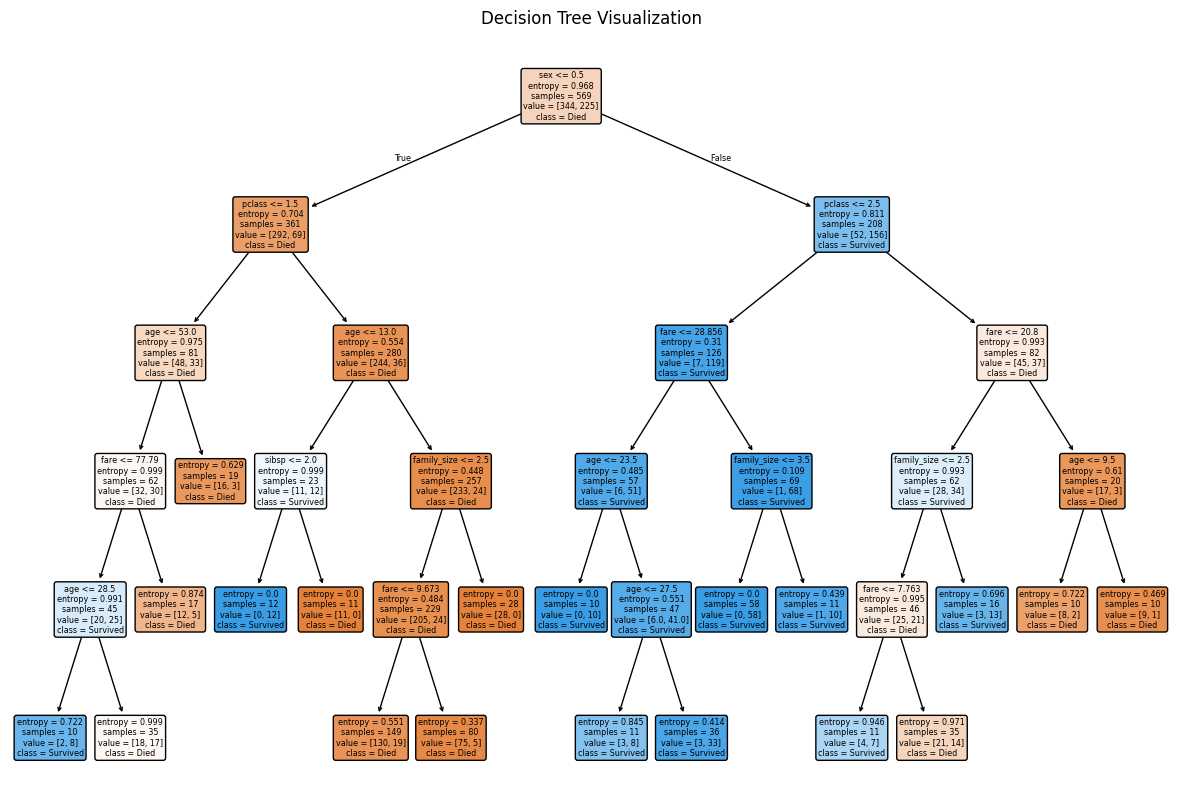

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["Died","Survived"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

We can do the same for a tree in the random forest.

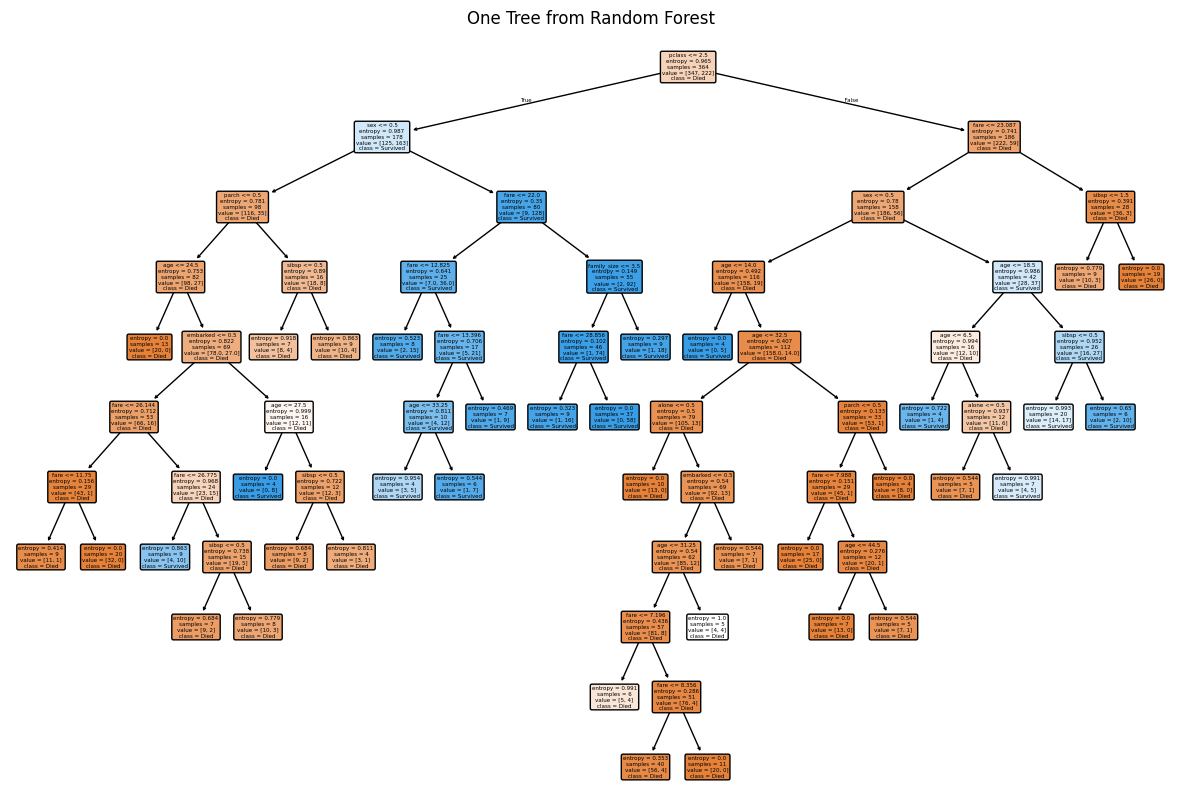

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(random_forest.estimators_[0], feature_names=X.columns, class_names=["Died","Survived"], filled=True, rounded=True)
plt.title("One Tree from Random Forest")
plt.show()

## **6. Classifier Comparison**

1.   Which model performed better on the test data? Why might that be?

2.   Looking at the tree plots, do the splits make sense intuitively?


## **7. Hyperparameter Tuning**
For each classifier, write code to change the following hyperparameters and plot their impacts on the model's performance.

**Decision Tree**
*   max_depth
*   min_samples_split
*   min_samples_leaf

In [1]:
# TODO: Evaluate hyperparameters

# 1. Define a list of hyperparameters and the values you want to loop through for each
# 2. Train and evaluate models:
#    - Loop through each hyperparameter and its corresponding values
#    - Train a new decision tree for each value and record its training and test accuracy
#    - Plot the accuracy vs hyperparameter value for each hyperparameter

**Random Forest**
* n_estimators
* max_depth
* min_samples_split
* max_features

In [2]:
# TODO: Evaluate hyperparameters

# 1. Define a list of hyperparameters and the values you want to loop through for each
# 2. Train and evaluate models:
#    - Loop through each hyperparameter and its corresponding values
#    - Train a new random forest for each value and record its training and test accuracy
#    - Plot the accuracy vs hyperparameter value for each hyperparameter

**Here are some questions to consider:**
1. How does increasing the `max_depth` of the decision tree classifier affect accuracy and overfitting? Did it have a different effect in the random forest classifier?

2. How does increasing the `n_estimators` in the random forest affect performance?

3. What did changing `min_samples_split` do? (Remember, this parameter controls when to stop splitting nodes)

4. What did changing `min_samples_leaf` do? What is the relationship between this and `min_samples_split`?